In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import random
from pandas import DataFrame
from datetime import datetime
import keras
from keras import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten, Reshape, Activation
from keras.layers import Conv1D, MaxPooling1D ,AveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras import backend as K
#from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
#from tensorflow.keras.optimizers import Adam

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4070228022074215087
xla_global_id: -1
]


In [3]:
def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]
print(get_available_devices()) 

['/device:CPU:0']


In [4]:
import pandas as pd
train_data = pd.read_csv('/data/yingfei/cancer_data/train_data_comb.csv')
test_data = pd.read_csv('/data/yingfei/cancer_data/test_data_comb.csv')

In [5]:
print(f'Train Shape: {train_data.shape}')
print(f'Test Shape: {test_data.shape}')

Train Shape: (203918, 2976)
Test Shape: (22878, 2976)


In [6]:
train_data = train_data.loc[train_data['auc'] >= 0]

In [7]:
train_data = train_data.reset_index(drop = True)
train_data

,ARXSPAN_ID,DRUG_NAME,ABL1_cnv,ACVR1B_cnv,AKT1_cnv,AKT2_cnv,AKT3_cnv,ALK_cnv,ALOX12B_cnv,FAM123B_cnv,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,auc
0,ACH-000001,JW-7-24-1,1,1,1,1,1,0,-1,0,...,0,0,0,0,0,0,0,0,0,0.778432
1,ACH-000001,KIN001-260,1,1,1,1,1,0,-1,0,...,0,0,0,0,0,0,0,0,0,0.951321
2,ACH-000001,NSC-87877,1,1,1,1,1,0,-1,0,...,0,0,0,0,0,0,0,0,0,0.840287
3,ACH-000001,PLX-4720,1,1,1,1,1,0,-1,0,...,0,0,0,0,0,0,0,0,0,0.936410
4,ACH-000001,ERK5-IN-1,1,1,1,1,1,0,-1,0,...,0,0,0,0,0,0,0,0,0,0.891908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203913,ACH-001716,KIN001-236,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.956865
203914,ACH-001716,LUMINESPIB,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.975168
203915,ACH-001716,NUTLIN-3A,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.871995
203916,ACH-001716,SGC0946,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.975417


In [8]:
test_data = test_data.loc[test_data['auc'] >= 0]

In [9]:
test_data = test_data.reset_index(drop = True)
test_data

,ARXSPAN_ID,DRUG_NAME,ABL1_cnv,ACVR1B_cnv,AKT1_cnv,AKT2_cnv,AKT3_cnv,ALK_cnv,ALOX12B_cnv,FAM123B_cnv,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,auc
0,ACH-000802,JW-7-24-1,1,0,1,-1,1,1,-1,0,...,0,0,0,0,0,0,0,0,0,0.528562
1,ACH-000802,KIN001-260,1,0,1,-1,1,1,-1,0,...,0,0,0,0,0,0,0,0,0,0.930958
2,ACH-000802,NSC-87877,1,0,1,-1,1,1,-1,0,...,0,0,0,0,0,0,0,0,0,0.759249
3,ACH-000802,PLX-4720,1,0,1,-1,1,1,-1,0,...,0,0,0,0,0,0,0,0,0,0.936510
4,ACH-000802,ERK5-IN-1,1,0,1,-1,1,1,-1,0,...,0,0,0,0,0,0,0,0,0,0.823453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22873,ACH-000438,KIN001-266,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.975578
22874,ACH-000438,LUMINESPIB,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.980529
22875,ACH-000438,NUTLIN-3A,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.960501
22876,ACH-000438,SGC0946,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.970524


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
padel_features = train_data[train_data.columns[-2326:-1]]
padel_features = scaler.fit_transform(padel_features)
padel_features = pd.DataFrame(padel_features)
#train_features = train_data.drop(columns = ['ARXSPAN_ID', 'DRUG_NAME','auc'])
#train_features = scaler.fit_transform(train_features)
train_features = train_data[train_data.columns[2:-2326]]
train_features = pd.concat([train_features, padel_features], axis = 1)
train_features = train_features.to_numpy()
train_features

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
train_label = train_data['auc']
print(f'Minimum train y value: {min(train_label)}, \
      Maximum train y value: {max(train_label)}')

Minimum train y value: 0.004496,       Maximum train y value: 0.999883


In [12]:
padel_features = test_data[test_data.columns[-2326:-1]]
padel_features = scaler.transform(padel_features)
padel_features = pd.DataFrame(padel_features)
#test_features = test_data.drop(columns = ['ARXSPAN_ID', 'DRUG_NAME','auc'])
#test_features = scaler.transform(test_features)
test_features = test_data[test_data.columns[2:-2326]]
test_features = pd.concat([test_features, padel_features], axis = 1)
test_features = test_features.to_numpy()
test_features

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
test_label = test_data['auc']
print(f'Minimum test y value: {min(test_label)}, \
      Maximum test y value: {max(test_label)}')

Minimum test y value: 0.013524,       Maximum test y value: 0.998284


In [14]:
train_X, train_y, test_X, test_y = train_features, train_label, test_features, test_label

In [15]:
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], 1)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], 1)

In [16]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(203918, 2973, 1) (203918,) (22878, 2973, 1) (22878,)


In [17]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_X shape: (203918, 2973, 1)
203918 train samples
22878 test samples


In [18]:
train_X = np.nan_to_num(train_X)
train_y = np.nan_to_num(train_y)
test_X = np.nan_to_num(test_X)
test_y = np.nan_to_num(test_y)

In [19]:
from bayes_opt import BayesianOptimization, UtilityFunction

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
### split into train and validation set
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, random_state = 42)

In [22]:
### Hyperparameters set
params_lst = ["learning_rate", "batch_size", "optimizer"]
params_value_dict = {"learning_rate": [1e-4, 2e-4, 5e-4], 
                     "batch_size": [80, 100, 120], 
                     "optimizer": ['sgd', 'adam']}
import itertools as it

allparams = params_value_dict
combinations = it.product(*(params_value_dict[param] for param in allparams))
combinations_lst = list(combinations)
print(len(combinations_lst))

hyper_param_dict = {}
for i in range(len(combinations_lst)):
    hyper_param_dict[i] = {}
    for j in range(len(params_lst)):
        hyper_param_dict[i][params_lst[j]] = combinations_lst[i][j]

18


In [23]:
import json
from keras.models import model_from_json, load_model
workdir = "resnet_ht_models/comb_model"

model_eval_dict = {}
model_dict = {}
training_epochs = 10
model_ht_history = {}

for i in hyper_param_dict:
    params_dict = hyper_param_dict[i]
    learning_rate=params_dict["learning_rate"] 
    batch_size=params_dict["batch_size"] 
    opt_name=params_dict["optimizer"]
    
    # hyper parameters
    num_classes = 1
    if opt_name == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate)
    else: # sgd
        optimizer = keras.optimizers.SGD(learning_rate)
    
    with K.tf.device('/GPU:0'): # model compile
        inputs = Input(shape=(train_X.shape[1],1),name='inputs')

        x = Conv1D(16, kernel_size=3, strides=2, padding="same")(inputs)
        x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
    #     y = x
        x = Activation('tanh')(x)

        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)

        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)


        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)


        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)

        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)


        x = Conv1D(16, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

        x = Conv1D(32, kernel_size=3, strides=2, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
    #     x = BatchNormalization()(x)

        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)


        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(32, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

        x = Conv1D(64, kernel_size=3, strides=2, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
    #     x = BatchNormalization()(x)

        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)


        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        y = x
        x = Activation('relu')(x)

        x = Conv1D(64, kernel_size=3, strides=1, padding="same")(x)
    #     x = MaxPooling1D(pool_size=5)(x)
        x = BatchNormalization()(x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

    #     x = AveragePooling1D(pool_size=8)(x)
        x = Flatten()(x)
        x = Dense(units=2048, name='dense1'  ) (x)
        x = BatchNormalization()(x)
        x = Dropout(0.1, name='dropout1') (x)
        x = Activation('relu')(x)

    #    x = Reshape((300,1))(x)

    #    x = Conv1D(30, kernel_size=150, strides=1, activation = 'relu')(x)
    #    x = MaxPooling1D(pool_size=2)(x)
    #    x = BatchNormalization()(x)

        x = Dense(units=1024, name='dense5'  ) (x)
        x = BatchNormalization()(x)
        y = x
        x = Dropout(0.1, name='dropout5') (x)
        x = Activation('relu')(x)

        x = Dense(units=512, name='dense6'  ) (x)
        x = BatchNormalization()(x)
        x = Dropout(0.1, name='dropout6') (x)
        x = Activation('relu')(x)

        x = Dense(units=1024, name='dense7'  ) (x)
        x = BatchNormalization()(x)
        x = Dropout(0.1, name='dropout7') (x)
        x = keras.layers.add([x,y])
        x = Activation('relu')(x)

        x = Dense(units=512, name='dense8'  ) (x)
        x = BatchNormalization()(x)
        x = Dropout(0.1, name='dropout8') (x)
        x = Activation('relu')(x)

        x = Dense(units=256, name='dense9'  ) (x)
        x = BatchNormalization()(x)
        x = Dropout(0.1, name='dropout9') (x)
        x = Activation('relu')(x)

        x = Dense(units=128, name='dense10'  ) (x)
        x = BatchNormalization()(x)
        y = x
        x = Dropout(0.1, name='dropout10') (x)
        x = Activation('relu')(x)


        predictions = Dense(1, activation='linear', name='predictions', kernel_initializer='he_normal')(x)

        model = Model(inputs=inputs, outputs=predictions, name='Test_v2_DNN')
        model.compile(loss=keras.losses.mean_squared_error,
                      optimizer=optimizer,
                      metrics=['mse','mae'])
        
        # model training
        StartTime8 = datetime.now()
        print("StartTime :", StartTime8)
        with K.tf.device('/GPU:0'):
            model_train = model.fit(train_X, train_y, batch_size=batch_size,epochs=training_epochs,verbose=1,
                                validation_data=(val_X, val_y))

        EndTime8 = datetime.now()
        print("EndTime :", EndTime8)
    model.save_weights(workdir+ f'/model_{i}_new.h5')
    with open(workdir + f'/model_architecture_{i}_new.json', 'w') as f:
        f.write(model.to_json())
        
    # evaluation
    print(f"Evaluating model {i}...")
    test_score = model.evaluate(test_X, test_y, verbose=1)
    model_ht_history[(learning_rate, batch_size)] = model
    loss, mse, mae = test_score
    print("loss=%.6f, mse=%.6f, mae=%.6f"%(loss, mse, mae))
    
    model_dict[i] = model
    model_eval_dict[i] = {"loss":loss, "mse":mse, "mae":mae}

StartTime : 2023-03-16 16:58:26.110549
Epoch 1/10
1912/1912 [==============================] - 386s 195ms/step - loss: 0.7704 - mse: 0.7704 - mae: 0.6914 - val_loss: 0.2699 - val_mse: 0.2699 - val_mae: 0.4169
Epoch 2/10
1912/1912 [==============================] - 362s 189ms/step - loss: 0.4464 - mse: 0.4464 - mae: 0.5293 - val_loss: 0.1830 - val_mse: 0.1830 - val_mae: 0.3420
Epoch 3/10
1912/1912 [==============================] - 361s 189ms/step - loss: 0.3341 - mse: 0.3341 - mae: 0.4575 - val_loss: 0.1467 - val_mse: 0.1467 - val_mae: 0.3072
Epoch 4/10
1912/1912 [==============================] - 356s 186ms/step - loss: 0.2619 - mse: 0.2619 - mae: 0.4045 - val_loss: 0.1196 - val_mse: 0.1196 - val_mae: 0.2770
Epoch 5/10
1912/1912 [==============================] - 358s 188ms/step - loss: 0.2138 - mse: 0.2138 - mae: 0.3648 - val_loss: 0.0982 - val_mse: 0.0982 - val_mae: 0.2508
Epoch 6/10
1912/1912 [==============================] - 352s 184ms/step - loss: 0.1784 - mse: 0.1784 - mae: 0.3

1275/1275 [==============================] - 308s 241ms/step - loss: 0.3733 - mse: 0.3733 - mae: 0.4843 - val_loss: 0.1854 - val_mse: 0.1854 - val_mae: 0.3463
Epoch 4/10
1275/1275 [==============================] - 307s 240ms/step - loss: 0.3057 - mse: 0.3057 - mae: 0.4376 - val_loss: 0.1468 - val_mse: 0.1468 - val_mae: 0.3091
Epoch 5/10
1275/1275 [==============================] - 308s 242ms/step - loss: 0.2602 - mse: 0.2602 - mae: 0.4047 - val_loss: 0.1243 - val_mse: 0.1243 - val_mae: 0.2835
Epoch 6/10
1275/1275 [==============================] - 311s 244ms/step - loss: 0.2228 - mse: 0.2228 - mae: 0.3742 - val_loss: 0.1073 - val_mse: 0.1073 - val_mae: 0.2638
Epoch 7/10
1275/1275 [==============================] - 306s 240ms/step - loss: 0.1949 - mse: 0.1949 - mae: 0.3492 - val_loss: 0.0979 - val_mse: 0.0979 - val_mae: 0.2521
Epoch 8/10
1275/1275 [==============================] - 311s 244ms/step - loss: 0.1729 - mse: 0.1729 - mae: 0.3294 - val_loss: 0.0854 - val_mse: 0.0854 - val_mae

1530/1530 [==============================] - 338s 221ms/step - loss: 0.1268 - mse: 0.1268 - mae: 0.2816 - val_loss: 0.0674 - val_mse: 0.0674 - val_mae: 0.2114
Epoch 6/10
1530/1530 [==============================] - 339s 221ms/step - loss: 0.1038 - mse: 0.1038 - mae: 0.2541 - val_loss: 0.0573 - val_mse: 0.0573 - val_mae: 0.1954
Epoch 7/10
1530/1530 [==============================] - 336s 220ms/step - loss: 0.0882 - mse: 0.0882 - mae: 0.2343 - val_loss: 0.0522 - val_mse: 0.0522 - val_mae: 0.1874
Epoch 8/10
1530/1530 [==============================] - 335s 219ms/step - loss: 0.0755 - mse: 0.0755 - mae: 0.2164 - val_loss: 0.0468 - val_mse: 0.0468 - val_mae: 0.1779
Epoch 9/10
1530/1530 [==============================] - 336s 219ms/step - loss: 0.0658 - mse: 0.0658 - mae: 0.2014 - val_loss: 0.0441 - val_mse: 0.0441 - val_mae: 0.1735
Epoch 10/10
1530/1530 [==============================] - 336s 220ms/step - loss: 0.0591 - mse: 0.0591 - mae: 0.1906 - val_loss: 0.0412 - val_mse: 0.0412 - val_ma

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1530/1530 [==============================] - 317s 207ms/step - loss: 0.0255 - mse: 0.0255 - mae: 0.1093 - val_loss: 0.0133 - val_mse: 0.0133 - val_mae: 0.0719
Epoch 4/10
1530/1530 [==============================] - 318s 208ms/step - loss: 0.0180 - mse: 0.0180 - mae: 0.0934 - val_loss: 0.0125 - val_mse: 0.0125 - val_mae: 0.0706
Epoch 5/10
 961/1530 [=================>............] - ETA: 1:50 - loss: 0.0160 - mse: 0.0160 - mae: 0.0879

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1510/1530 [============================>.] - ETA: 3s - loss: 0.0137 - mse: 0.0137 - mae: 0.0792

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1530/1530 [==============================] - 325s 212ms/step - loss: 0.0132 - mse: 0.0132 - mae: 0.0775 - val_loss: 0.0136 - val_mse: 0.0136 - val_mae: 0.0693
Epoch 10/10
1530/1530 [==============================] - 320s 209ms/step - loss: 0.0128 - mse: 0.0128 - mae: 0.0758 - val_loss: 0.0118 - val_mse: 0.0118 - val_mae: 0.0664
EndTime : 2023-03-17 02:31:27.423866
Evaluating model 9...
715/715 [==============================] - 31s 43ms/step - loss: 0.0168 - mse: 0.0168 - mae: 0.0777
loss=0.016787, mse=0.016787, mae=0.077738
StartTime : 2023-03-17 02:32:11.581942
Epoch 1/10
 146/1275 [==>...........................] - ETA: 3:57 - loss: 0.9524 - mse: 0.9524 - mae: 0.7799

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 973/1275 [=====================>........] - ETA: 1:05 - loss: 0.2309 - mse: 0.2309 - mae: 0.3788

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1275/1275 [==============================] - 294s 230ms/step - loss: 0.1759 - mse: 0.1759 - mae: 0.3305 - val_loss: 0.0818 - val_mse: 0.0818 - val_mae: 0.2302
Epoch 5/10
1275/1275 [==============================] - 297s 233ms/step - loss: 0.1425 - mse: 0.1425 - mae: 0.2975 - val_loss: 0.0679 - val_mse: 0.0679 - val_mae: 0.2100
Epoch 6/10
 995/1275 [======================>.......] - ETA: 59s - loss: 0.1209 - mse: 0.1209 - mae: 0.2739 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1275/1275 [==============================] - 294s 231ms/step - loss: 0.0892 - mse: 0.0892 - mae: 0.2352 - val_loss: 0.0490 - val_mse: 0.0490 - val_mae: 0.1800
Epoch 9/10
 441/1275 [=========>....................] - ETA: 2:56 - loss: 0.0812 - mse: 0.0812 - mae: 0.2242

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1275/1275 [==============================] - 298s 234ms/step - loss: 0.0703 - mse: 0.0703 - mae: 0.2079 - val_loss: 0.0415 - val_mse: 0.0415 - val_mae: 0.1655
EndTime : 2023-03-17 03:21:48.386565
Evaluating model 10...
715/715 [==============================] - 27s 38ms/step - loss: 0.0454 - mse: 0.0454 - mae: 0.1725
loss=0.045415, mse=0.045415, mae=0.172548
StartTime : 2023-03-17 03:22:18.029086
Epoch 1/10
 718/1275 [===============>..............] - ETA: 1:54 - loss: 0.2683 - mse: 0.2683 - mae: 0.3807

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1275/1275 [==============================] - 287s 225ms/step - loss: 0.0189 - mse: 0.0189 - mae: 0.0983 - val_loss: 0.0131 - val_mse: 0.0131 - val_mae: 0.0729
Epoch 5/10
 996/1275 [======================>.......] - ETA: 57s - loss: 0.0163 - mse: 0.0163 - mae: 0.0895

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1275/1275 [==============================] - 287s 225ms/step - loss: 0.0149 - mse: 0.0149 - mae: 0.0845 - val_loss: 0.0133 - val_mse: 0.0133 - val_mae: 0.0717
Epoch 7/10
1275/1275 [==============================] - 286s 225ms/step - loss: 0.0141 - mse: 0.0141 - mae: 0.0812 - val_loss: 0.0124 - val_mse: 0.0124 - val_mae: 0.0690
Epoch 8/10
 239/1275 [====>.........................] - ETA: 3:35 - loss: 0.0137 - mse: 0.0137 - mae: 0.0798

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1275/1275 [==============================] - 287s 225ms/step - loss: 0.0132 - mse: 0.0132 - mae: 0.0779 - val_loss: 0.0118 - val_mse: 0.0118 - val_mae: 0.0682
Epoch 10/10
1037/1275 [=======================>......] - ETA: 49s - loss: 0.0126 - mse: 0.0126 - mae: 0.0756

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1912/1912 [==============================] - 383s 195ms/step - loss: 0.3818 - mse: 0.3818 - mae: 0.4799 - val_loss: 0.1161 - val_mse: 0.1161 - val_mae: 0.2761
Epoch 2/10
1362/1912 [====================>.........] - ETA: 1:39 - loss: 0.1627 - mse: 0.1627 - mae: 0.3192

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1912/1912 [==============================] - 378s 198ms/step - loss: 0.0639 - mse: 0.0639 - mae: 0.1986 - val_loss: 0.0485 - val_mse: 0.0485 - val_mae: 0.1873
Epoch 5/10
1857/1912 [============================>.] - ETA: 9s - loss: 0.0497 - mse: 0.0497 - mae: 0.1738 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1912/1912 [==============================] - 374s 196ms/step - loss: 0.0368 - mse: 0.0368 - mae: 0.1476 - val_loss: 0.0356 - val_mse: 0.0356 - val_mae: 0.1617
Epoch 8/10
1875/1912 [============================>.] - ETA: 6s - loss: 0.0339 - mse: 0.0339 - mae: 0.1409

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1786/1912 [===========================>..] - ETA: 22s - loss: 0.0316 - mse: 0.0316 - mae: 0.1351

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1912/1912 [==============================] - 364s 183ms/step - loss: 0.0889 - mse: 0.0889 - mae: 0.1851 - val_loss: 0.0167 - val_mse: 0.0167 - val_mae: 0.0826
Epoch 2/10
1539/1912 [=======================>......] - ETA: 1:03 - loss: 0.0218 - mse: 0.0218 - mae: 0.1053

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1912/1912 [==============================] - 359s 188ms/step - loss: 0.0151 - mse: 0.0151 - mae: 0.0841 - val_loss: 0.0128 - val_mse: 0.0128 - val_mae: 0.0709
Epoch 5/10
1912/1912 [==============================] - 357s 187ms/step - loss: 0.0146 - mse: 0.0146 - mae: 0.0817 - val_loss: 0.0145 - val_mse: 0.0145 - val_mae: 0.0760
Epoch 6/10
 356/1912 [====>.........................] - ETA: 4:25 - loss: 0.0145 - mse: 0.0145 - mae: 0.0804

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1912/1912 [==============================] - 359s 188ms/step - loss: 0.0133 - mse: 0.0133 - mae: 0.0758 - val_loss: 0.0130 - val_mse: 0.0130 - val_mae: 0.0697
Epoch 9/10
1912/1912 [==============================] - 358s 187ms/step - loss: 0.0131 - mse: 0.0131 - mae: 0.0748 - val_loss: 0.0120 - val_mse: 0.0120 - val_mae: 0.0689
Epoch 10/10
 693/1912 [=========>....................] - ETA: 3:30 - loss: 0.0127 - mse: 0.0127 - mae: 0.0735

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1530/1530 [==============================] - 348s 227ms/step - loss: 0.0791 - mse: 0.0791 - mae: 0.2207 - val_loss: 0.0520 - val_mse: 0.0520 - val_mae: 0.1884
Epoch 5/10
1530/1530 [==============================] - 345s 226ms/step - loss: 0.0625 - mse: 0.0625 - mae: 0.1949 - val_loss: 0.0463 - val_mse: 0.0463 - val_mae: 0.1796
Epoch 6/10
 382/1530 [======>.......................] - ETA: 3:58 - loss: 0.0553 - mse: 0.0553 - mae: 0.1828

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1530/1530 [==============================] - 343s 224ms/step - loss: 0.0368 - mse: 0.0368 - mae: 0.1465 - val_loss: 0.0353 - val_mse: 0.0353 - val_mae: 0.1589
EndTime : 2023-03-17 07:13:12.564198
Evaluating model 14...
715/715 [==============================] - 27s 38ms/step - loss: 0.0369 - mse: 0.0369 - mae: 0.1609
loss=0.036875, mse=0.036875, mae=0.160922
StartTime : 2023-03-17 07:13:45.814864
Epoch 1/10
1479/1530 [============================>.] - ETA: 9s - loss: 0.1131 - mse: 0.1131 - mae: 0.2102 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1530/1530 [==============================] - 318s 208ms/step - loss: 0.0151 - mse: 0.0151 - mae: 0.0847 - val_loss: 0.0127 - val_mse: 0.0127 - val_mae: 0.0735
Epoch 5/10
1530/1530 [==============================] - 321s 210ms/step - loss: 0.0144 - mse: 0.0144 - mae: 0.0820 - val_loss: 0.0127 - val_mse: 0.0127 - val_mae: 0.0701
Epoch 6/10
  83/1530 [>.............................] - ETA: 4:42 - loss: 0.0144 - mse: 0.0144 - mae: 0.0814

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1530/1530 [==============================] - 322s 211ms/step - loss: 0.0134 - mse: 0.0134 - mae: 0.0766 - val_loss: 0.0129 - val_mse: 0.0129 - val_mae: 0.0709
Epoch 9/10
1530/1530 [==============================] - 321s 210ms/step - loss: 0.0132 - mse: 0.0132 - mae: 0.0759 - val_loss: 0.0126 - val_mse: 0.0126 - val_mae: 0.0739
Epoch 10/10
1282/1530 [========================>.....] - ETA: 46s - loss: 0.0127 - mse: 0.0127 - mae: 0.0741

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1275/1275 [==============================] - 296s 232ms/step - loss: 0.1238 - mse: 0.1238 - mae: 0.2787 - val_loss: 0.0591 - val_mse: 0.0591 - val_mae: 0.1989
Epoch 4/10
1275/1275 [==============================] - 299s 234ms/step - loss: 0.0873 - mse: 0.0873 - mae: 0.2337 - val_loss: 0.0441 - val_mse: 0.0441 - val_mae: 0.1714
Epoch 5/10
 688/1275 [===============>..............] - ETA: 2:09 - loss: 0.0704 - mse: 0.0704 - mae: 0.2098

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1275/1275 [==============================] - 304s 239ms/step - loss: 0.0354 - mse: 0.0354 - mae: 0.1455 - val_loss: 0.0269 - val_mse: 0.0269 - val_mae: 0.1329
Epoch 10/10
1275/1275 [==============================] - 306s 240ms/step - loss: 0.0324 - mse: 0.0324 - mae: 0.1385 - val_loss: 0.0261 - val_mse: 0.0261 - val_mae: 0.1307
EndTime : 2023-03-17 08:58:40.396260
Evaluating model 16...
715/715 [==============================] - 27s 38ms/step - loss: 0.0269 - mse: 0.0269 - mae: 0.1307
loss=0.026893, mse=0.026893, mae=0.130717
StartTime : 2023-03-17 08:59:10.722545
Epoch 1/10
 661/1275 [==============>...............] - ETA: 2:09 - loss: 0.1157 - mse: 0.1157 - mae: 0.2247

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1275/1275 [==============================] - 296s 232ms/step - loss: 0.0140 - mse: 0.0140 - mae: 0.0802 - val_loss: 0.0122 - val_mse: 0.0122 - val_mae: 0.0681
Epoch 6/10
1275/1275 [==============================] - 298s 234ms/step - loss: 0.0136 - mse: 0.0136 - mae: 0.0786 - val_loss: 0.0133 - val_mse: 0.0133 - val_mae: 0.0693
Epoch 7/10
 512/1275 [===========>..................] - ETA: 2:47 - loss: 0.0138 - mse: 0.0138 - mae: 0.0785

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [24]:
min_mse = 10
bst_model_id_lst = []
for i in model_eval_dict:
    if model_eval_dict[i]['mse'] < min_mse:
        bst_model_id_lst = []
        bst_model_id_lst.append(i)
        min_mse = model_eval_dict[i]['mse']
    elif model_eval_dict[i]['mse'] == min_mse:
        bst_model_id_lst.append(i)

In [25]:
bst_model_id_lst

[15]

In [26]:
model_eval_dict[15]

{'loss': 0.015598895028233528,
 'mse': 0.015598895028233528,
 'mae': 0.07869283109903336}

In [27]:
hyper_param_dict[15]

{'learning_rate': 0.0005, 'batch_size': 100, 'optimizer': 'adam'}

In [28]:
best_model = model_dict[15]

In [29]:
model_ht_history[(0.0005, 100)] is best_model

True

In [30]:
import json
from keras.models import model_from_json, load_model
workdir = "resnet_ht_models/comb_model"

json_file = open(workdir +'/model_architecture_15_new.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(workdir +"/model_15_new.h5")

In [31]:
best_model = loaded_model

In [32]:
best_model.compile(loss=keras.losses.mean_squared_error,
                  optimizer=tf.keras.optimizers.Adam(0.0005),
                  metrics=['mse','mae'])

In [33]:
test_eval = best_model.evaluate(test_X, test_y, verbose=1)

715/715 [==============================] - 27s 35ms/step - loss: 0.0156 - mse: 0.0156 - mae: 0.0787


In [34]:
test_eval

[0.015598895028233528, 0.015598895028233528, 0.07869283109903336]

In [35]:
model_train = best_model.fit(train_X, train_y, batch_size=batch_size,epochs=training_epochs,verbose=1,
                                validation_data=(val_X, val_y))

Epoch 1/10
1275/1275 [==============================] - 299s 228ms/step - loss: 0.0123 - mse: 0.0123 - mae: 0.0724 - val_loss: 0.0123 - val_mse: 0.0123 - val_mae: 0.0682
Epoch 2/10
1275/1275 [==============================] - 301s 236ms/step - loss: 0.0119 - mse: 0.0119 - mae: 0.0708 - val_loss: 0.0121 - val_mse: 0.0121 - val_mae: 0.0674
Epoch 3/10
1275/1275 [==============================] - 292s 229ms/step - loss: 0.0114 - mse: 0.0114 - mae: 0.0690 - val_loss: 0.0111 - val_mse: 0.0111 - val_mae: 0.0677
Epoch 4/10
1275/1275 [==============================] - 285s 223ms/step - loss: 0.0111 - mse: 0.0111 - mae: 0.0681 - val_loss: 0.0108 - val_mse: 0.0108 - val_mae: 0.0636
Epoch 5/10
1275/1275 [==============================] - 289s 227ms/step - loss: 0.0106 - mse: 0.0106 - mae: 0.0666 - val_loss: 0.0108 - val_mse: 0.0108 - val_mae: 0.0650
Epoch 6/10
1275/1275 [==============================] - 291s 228ms/step - loss: 0.0102 - mse: 0.0102 - mae: 0.0652 - val_loss: 0.0100 - val_mse: 0.010

In [36]:
best_model.summary()

Model: "Test_v2_DNN"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 2973, 1)]    0           []                               
                                                                                                  
 conv1d_330 (Conv1D)            (None, 1487, 16)     64          ['inputs[0][0]']                 
                                                                                                  
 max_pooling1d_15 (MaxPooling1D  (None, 297, 16)     0           ['conv1d_330[0][0]']             
 )                                                                                                
                                                                                                  
 batch_normalization_405 (Batch  (None, 297, 16)     64          ['max_pooling1d_15[0][0

                                                                                                  
 add_137 (Add)                  (None, 149, 32)      0           ['batch_normalization_414[0][0]',
                                                                  'batch_normalization_413[0][0]']
                                                                                                  
 activation_414 (Activation)    (None, 149, 32)      0           ['add_137[0][0]']                
                                                                                                  
 conv1d_341 (Conv1D)            (None, 149, 32)      3104        ['activation_414[0][0]']         
                                                                                                  
 batch_normalization_415 (Batch  (None, 149, 32)     128         ['conv1d_341[0][0]']             
 Normalization)                                                                                   
          

 conv1d_351 (Conv1D)            (None, 75, 64)       12352       ['activation_423[0][0]']         
                                                                                                  
 batch_normalization_424 (Batch  (None, 75, 64)      256         ['conv1d_351[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 add_142 (Add)                  (None, 75, 64)       0           ['batch_normalization_424[0][0]',
                                                                  'batch_normalization_423[0][0]']
                                                                                                  
 activation_424 (Activation)    (None, 75, 64)       0           ['add_142[0][0]']                
                                                                                                  
 flatten_1

In [37]:
# mse and loss monitor

accuracy = model_train.history['mse']
val_accuracy = model_train.history['val_mse']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']

np_acc = np.array(accuracy)
np_val_acc = np.array(val_accuracy)
np_loss = np.array(loss)
np_val_loss = np.array(val_loss)

In [38]:
import matplotlib
from matplotlib import pyplot as plt

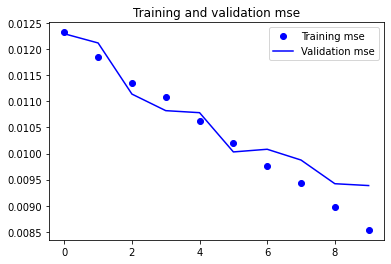

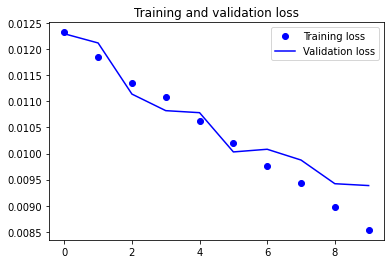

In [39]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training mse')
plt.plot(epochs, val_accuracy, 'b', label='Validation mse')
plt.title('Training and validation mse')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig(workdir + '//mse_loss_plot.png')
plt.show()

In [40]:
# test validation
predicted_classes = best_model.predict(test_X)

715/715 [==============================] - 30s 40ms/step


In [41]:
predicted_value = predicted_classes

In [42]:
a = pd.DataFrame(predicted_value)
b = pd.DataFrame(test_y)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]

In [66]:
c.to_csv(workdir + '/DeepAUCv2_epoch_10_ht_result_new.csv')

In [44]:
c

,Predicted,Test
0,0.682176,0.528562
1,0.917732,0.930958
2,0.875777,0.759249
3,0.945663,0.936510
4,0.859368,0.823453
...,...,...
22873,0.729678,0.975578
22874,0.976484,0.980529
22875,0.922746,0.960501
22876,0.976536,0.970524


In [45]:
predicted_value.shape

(22878, 1)

Text(0, 0.5, 'predicted_AUC_value')

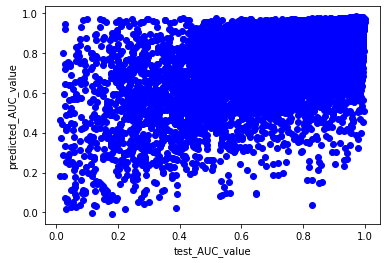

In [46]:
# scatter plot as test validation
plt.scatter(test_y,predicted_value,c='blue')
plt.xlabel('test_AUC_value')
plt.ylabel('predicted_AUC_value')
# plt.savefig(workdir + '/DeepAUCv2_epoch_10_ht_test_scatterplot_new.png')

In [47]:
# calculate RMSE

rse = ((b[0]-a[0])**2).sum()
mse = rse / len(b)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 0.12862237734620172


In [48]:
mae = (np.abs(b[0]-a[0])).sum()
mae / len(b)

0.07811579817565177

In [49]:
mse

0.016543715954188704

In [50]:
# R-squared value

from sklearn.metrics import r2_score
r2_value = r2_score(b, a) 
print(r2_value)

0.5080917901797122


In [51]:
full_test = pd.read_csv('/data/yingfei/cancer_data/test_data.csv')

In [52]:
full_test = full_test[['ARXSPAN_ID', 'DRUG_NAME']]

In [53]:
eval_data = test_data[['ARXSPAN_ID', 'DRUG_NAME', 'auc']].copy()
eval_data['pred_auc'] = predicted_value
eval_data

,ARXSPAN_ID,DRUG_NAME,auc,pred_auc
0,ACH-000802,JW-7-24-1,0.528562,0.682176
1,ACH-000802,KIN001-260,0.930958,0.917732
2,ACH-000802,NSC-87877,0.759249,0.875777
3,ACH-000802,PLX-4720,0.936510,0.945663
4,ACH-000802,ERK5-IN-1,0.823453,0.859368
...,...,...,...,...
22873,ACH-000438,KIN001-266,0.975578,0.729678
22874,ACH-000438,LUMINESPIB,0.980529,0.976484
22875,ACH-000438,NUTLIN-3A,0.960501,0.922746
22876,ACH-000438,SGC0946,0.970524,0.976536


In [54]:
full_test['comb'] = full_test.ARXSPAN_ID + full_test.DRUG_NAME
eval_data['comb'] = eval_data.ARXSPAN_ID + eval_data.DRUG_NAME
eval_data = pd.merge(full_test, eval_data, on = ['ARXSPAN_ID', 'DRUG_NAME'], how = 'left')

In [55]:
type(full_test.comb[0])

str

In [56]:
eval_data_arr = pd.DataFrame(eval_data.ARXSPAN_ID.unique(), columns = ['ARXSPAN_ID'])
eval_data_arr['true_auc_arr'] = [[] for _ in range(len(eval_data_arr))]
eval_data_arr['pred_auc_arr'] = [[] for _ in range(len(eval_data_arr))]
eval_data_arr

,ARXSPAN_ID,true_auc_arr,pred_auc_arr
0,ACH-000802,[],[]
1,ACH-001496,[],[]
2,ACH-000267,[],[]
3,ACH-000508,[],[]
4,ACH-001106,[],[]
...,...,...,...
64,ACH-000953,[],[]
65,ACH-000561,[],[]
66,ACH-000819,[],[]
67,ACH-000873,[],[]


In [57]:
for i in range(len(eval_data)):
    cl_id = eval_data.loc[i, 'ARXSPAN_ID']
    auc = eval_data.loc[i, 'auc']
    pred_auc =  eval_data.loc[i, 'pred_auc']
    if np.isnan(auc):
        #eval_data_arr.loc[eval_data_arr.ARXSPAN_ID == cl_id, 'true_auc_arr'].values[0].append(1)
        #eval_data_arr.loc[eval_data_arr.ARXSPAN_ID == cl_id, 'pred_auc_arr'].values[0].append(1)
        continue
    eval_data_arr.loc[eval_data_arr.ARXSPAN_ID == cl_id, 'true_auc_arr'].values[0].append(auc)
    eval_data_arr.loc[eval_data_arr.ARXSPAN_ID == cl_id, 'pred_auc_arr'].values[0].append(pred_auc)

In [58]:
eval_data_arr

,ARXSPAN_ID,true_auc_arr,pred_auc_arr
0,ACH-000802,"[0.528562, 0.930958, 0.759249, 0.93651, 0.8234...","[0.68217605, 0.9177323, 0.87577736, 0.9456634,..."
1,ACH-001496,"[0.8600040000000001, 0.935607, 0.919367, 0.861...","[0.5477828, 0.9244617, 0.90034974, 0.93516946,..."
2,ACH-000267,"[0.730128, 0.930868, 0.761296, 0.94428, 0.7239...","[0.59813344, 0.91872066, 0.8638028, 0.6393524,..."
3,ACH-000508,"[0.958722, 0.966097, 0.832343, 0.818851, 0.953...","[0.7384716, 0.94181216, 0.89044666, 0.8122955,..."
4,ACH-001106,"[0.670247, 0.845083, 0.720917, 0.705755, 0.865...","[0.64777327, 0.8855921, 0.88230455, 0.7109167,..."
...,...,...,...
64,ACH-000953,"[0.771624, 0.902238, 0.788892, 0.987629, 0.977...","[0.6940112, 0.83775795, 0.78701276, 0.69917464..."
65,ACH-000561,"[0.806557, 0.92585, 0.747498, 0.974266, 0.7882...","[0.73899513, 0.92920077, 0.87240815, 0.96024, ..."
66,ACH-000819,"[0.8246040000000001, 0.93947, 0.778985, 0.9747...","[0.6987132, 0.8984181, 0.8696494, 0.9215788, 0..."
67,ACH-000873,"[0.6613979999999999, 0.876398, 0.837356, 0.971...","[0.68555737, 0.89708185, 0.8991858, 0.92504114..."


In [59]:
pred_values = eval_data_arr.pred_auc_arr.apply(lambda x: np.array(x)).to_numpy()
true_values = eval_data_arr.true_auc_arr.apply(lambda x: np.array(x)).to_numpy()

In [60]:
### NDCG
from sklearn.metrics import ndcg_score
#ndcg_all = ndcg_score([p for p in pred_values],[t for t in true_values])
#ndcg_10 = ndcg_score([p for p in pred_values],[t for t in true_values], k = 10)
ndcg_all_values = []
ndcg_10_values = []
for i in range(len(pred_values)):
    pred_value = eval_data_arr['pred_auc_arr'].apply(lambda x:list(map(lambda y:1-y, x)))[i]
    true_value = eval_data_arr['true_auc_arr'].apply(lambda x:list(map(lambda y:1-y, x)))[i]
    ndcg_all_values.append(ndcg_score([pred_value],[true_value]))
    ndcg_10_values.append(ndcg_score([pred_value],[true_value], k = 10))
    
ndcg_all = np.mean(ndcg_all_values)
ndcg_10 = np.mean(ndcg_10_values)

print(ndcg_all)
print(ndcg_10)

0.9249250035022978
0.7603030356834578


In [61]:
### Recall
results = []
for top_k in [1, 2, 5, 10]:
    dict_test_cell_line_idx_perf = {}
    for cur_cell_line_idx in range(len(pred_values)):
        # step 1
        # per the ground truth
        gt_aucs = true_values[cur_cell_line_idx]
        # find the top k drugs's idx
        topk_drug_idx_gt = np.argsort(gt_aucs)[:top_k]
        # step 2
        # per the predicted scores
        pred_scores = pred_values[cur_cell_line_idx]
        assert gt_aucs.shape == pred_scores.shape
        # find the top k drugs'idx (note: here its by pred scores)
        topk_drug_idx_pred = np.argsort(pred_scores)[:top_k]
        # step 3
        # recall@k
        cur_recall_at_k = len(
            set(topk_drug_idx_pred).intersection(set(topk_drug_idx_gt))
        ) / len(set(topk_drug_idx_gt))
        dict_test_cell_line_idx_perf[cur_cell_line_idx] = cur_recall_at_k

    avg_recall_at_k = np.mean(list(dict_test_cell_line_idx_perf.values()))
    results.append((f"Recall@{top_k}", round(avg_recall_at_k, 4)))
print(results)

[('Recall@1', 0.3333), ('Recall@2', 0.3913), ('Recall@5', 0.3739), ('Recall@10', 0.4406)]


In [62]:
### AUC
results = []
for top_k in [1, 2, 5, 10]:
    dict_test_cell_line_topk_auc_sum_gt = {}
    dict_test_cell_line_topk_auc_sum_pred = {}
    for cur_cell_line_idx in range(len(pred_values)):
        # step 1
        # per the predicted scores
        pred_scores = pred_values[cur_cell_line_idx]
        # find the top k drugs'idx (note: here its by pred scores)
        topk_drug_idx_pred = np.argsort(pred_scores)[:top_k]
        # step 2
        # per the ground truth
        gt_aucs = true_values[cur_cell_line_idx]
        # find the top k predicted drugs' (per ground truth) aucs
        topk_drug_idx_gt = np.argsort(gt_aucs)[:top_k]
        dict_test_cell_line_topk_auc_sum_gt[cur_cell_line_idx] = np.mean(
            gt_aucs[topk_drug_idx_gt]
        )
        dict_test_cell_line_topk_auc_sum_pred[cur_cell_line_idx] = np.mean(
            gt_aucs[topk_drug_idx_pred]
        )

    avg_auc_topk_gt = np.mean(
        list(dict_test_cell_line_topk_auc_sum_gt.values())
    )
    avg_auc_topk_pred = np.mean(
        list(dict_test_cell_line_topk_auc_sum_pred.values())
    )

    results.append(
        (
            f"Auc@{top_k}",
            f"{round(avg_auc_topk_pred, 4)} (GT: {round(avg_auc_topk_gt, 4)})",
        )
    )

print(results)

[('Auc@1', '0.2453 (GT: 0.1198)'), ('Auc@2', '0.3106 (GT: 0.157)'), ('Auc@5', '0.4152 (GT: 0.222)'), ('Auc@10', '0.4475 (GT: 0.2893)')]


In [63]:
from scipy.stats import pearsonr, spearmanr
print(pearsonr(c.Predicted, c.Test)[0], spearmanr(c.Predicted, c.Test)[0])

0.7191598193085215 0.7230984375685384


In [64]:
c

,Predicted,Test
0,0.682176,0.528562
1,0.917732,0.930958
2,0.875777,0.759249
3,0.945663,0.936510
4,0.859368,0.823453
...,...,...
22873,0.729678,0.975578
22874,0.976484,0.980529
22875,0.922746,0.960501
22876,0.976536,0.970524


In [65]:
c.to_csv(workdir + '/DeepAUCv2_epoch_10_ht_result_new.csv')

In [ ]:
[('Auc@1', '0.36090001463890076 (GT: 0.11209999769926071)'), ('Auc@2', '0.40849998593330383 (GT: 0.24279999732971191)'), ('Auc@5', '0.4742000102996826 (GT: 0.3368000090122223)'), ('Auc@10', '0.5327000021934509 (GT: 0.3993000090122223)')]

In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')